# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv(r'C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Modulo9AgragacoesOperaçoes\Aula1\SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.tail()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27027,1,2795655.0,510792,1,18,5.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2780269,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc_raw_red1 = sinasc_raw[["IDADEMAE","munResNome"]]
sinasc_raw_red1.head()

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste


In [5]:
sinasc_raw_red1.groupby(["munResNome"]).mean()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,25.991826
Alto Alegre dos Parecis,24.844156
Alto Paraíso,24.960177
Alvorada D'Oeste,25.770732
Ariquemes,25.607866
Buritis,25.559177
Cabixi,26.037500
Cacaulândia,25.546667
Cacoal,26.890102


<AxesSubplot:xlabel='munResNome'>

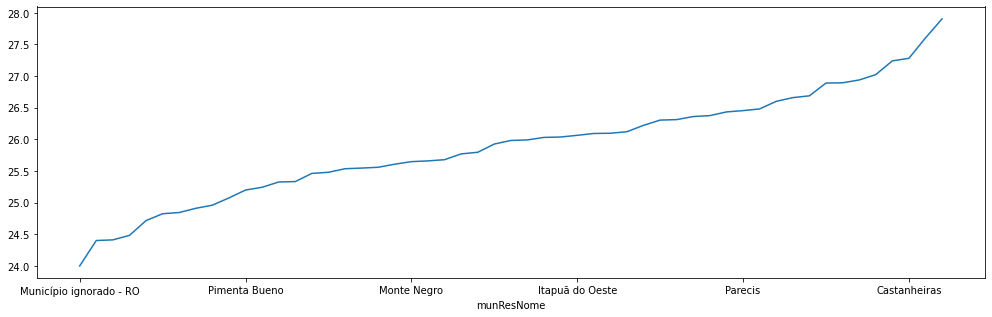

In [6]:
sinasc_raw_red1.groupby(["munResNome"])["IDADEMAE"].mean().sort_values().plot(figsize=[17,5])

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
sinasc_raw_red2 = sinasc_raw[["DTNASC","ESCMAE","PESO"]]
sinasc_raw_red2.head()

,DTNASC,ESCMAE,PESO
0,2019-02-19,8 a 11 anos,3685
1,2019-02-21,8 a 11 anos,3055
2,2019-02-25,8 a 11 anos,3460
3,2019-03-20,12 anos ou mais,2982
4,2019-03-23,8 a 11 anos,3310


In [8]:
sinasc_raw_red2[sinasc_raw_red2["DTNASC"] =="2019-10-01"].groupby(["DTNASC","ESCMAE"]).mean()

PESO
DTNASC     ESCMAE                      
2019-10-01 12 anos ou mais  3136.173913
           4 a 7 anos       3478.333333
           8 a 11 anos      3222.803922

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [9]:
sinasc_raw_red3 = sinasc_raw[["munResNome","IDADEMAE","IDADEPAI","DTNASC"]]
sinasc_raw_red3.tail()

,munResNome,IDADEMAE,IDADEPAI,DTNASC
27023,Vilhena,32,35.0,2019-12-13
27024,Chupinguaia,19,NaN,2019-10-04
27025,Vilhena,24,30.0,2019-08-02
27026,Vilhena,21,24.0,2019-12-23
27027,Novo Horizonte do Oeste,18,NaN,2019-12-27


In [10]:
sinasc_raw_red3.groupby(["munResNome"])["DTNASC"].count().sort_values()

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

In [11]:
sinasc_raw_red3[sinasc_raw_red3["munResNome"] =="Município ignorado - RO"].groupby(["munResNome"]).describe()

IDADEMAE                                          \
                           count  mean std   min   25%   50%   75%   max   
munResNome                                                                 
Município ignorado - RO      1.0  24.0 NaN  24.0  24.0  24.0  24.0  24.0   

                        IDADEPAI                                          
                           count  mean std   min   25%   50%   75%   max  
munResNome                                                                
Município ignorado - RO      1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [12]:
sinasc_raw_red4 = sinasc_raw[["munResNome","IDADEMAE","IDADEPAI","DTNASC","CONTADOR","QTDFILVIVO"]]
sinasc_raw_red4["DTNASC"] = pd.to_datetime(sinasc_raw_red4["DTNASC"])
sinasc_raw_red4.set_index("DTNASC",inplace=True)
sinasc_raw_red4["mes"] = sinasc_raw_red4.index.month

sinasc_raw_red4.tail()

C:\Users\Positivo\AppData\Local\Temp\ipykernel_11000\268302368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_raw_red4["DTNASC"] = pd.to_datetime(sinasc_raw_red4["DTNASC"])
C:\Users\Positivo\AppData\Local\Temp\ipykernel_11000\268302368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_raw_red4["mes"] = sinasc_raw_red4.index.month


,munResNome,IDADEMAE,IDADEPAI,CONTADOR,QTDFILVIVO,mes
DTNASC,,,,,,
2019-12-13,Vilhena,32,35.0,2767632,1.0,12
2019-10-04,Chupinguaia,19,NaN,2772678,0.0,10
2019-08-02,Vilhena,24,30.0,2776905,0.0,8
2019-12-23,Vilhena,21,24.0,2777105,1.0,12
2019-12-27,Novo Horizonte do Oeste,18,NaN,2780269,1.0,12


In [13]:
sinasc_raw_red4[sinasc_raw_red4["mes"]==3].groupby(["munResNome"])["CONTADOR"].count().sort_values(ascending=False)

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

# qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

In [14]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby(["munResNome"])[["QTDFILVIVO"]].max()

,QTDFILVIVO
munResNome,
Porto Velho,9.0


In [15]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby(["munResNome"])[["QTDFILVIVO"]].mean()

,QTDFILVIVO
munResNome,
Porto Velho,1.295056


In [16]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby("munResNome")[["QTDFILVIVO"]].min()

,QTDFILVIVO
munResNome,
Porto Velho,0.0


# qual a idade media, maxima, minima dos pais nesse municipio?

In [17]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby("munResNome")[["IDADEPAI"]].max()

,IDADEPAI
munResNome,
Porto Velho,62.0


In [18]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby("munResNome")[["IDADEPAI"]].min()

,IDADEPAI
munResNome,
Porto Velho,19.0


In [19]:
sinasc_raw_red4[(sinasc_raw_red4["munResNome"]=="Porto Velho") & (sinasc_raw_red4["mes"]==3)].groupby("munResNome")[["IDADEPAI"]].mean()

,IDADEPAI
munResNome,
Porto Velho,34.629032


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [20]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [23]:
base_reduzida = sinasc_raw.select_dtypes(exclude=['int64','float64'])

base_reduzida.head()

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


<AxesSubplot:xlabel='SEXO'>

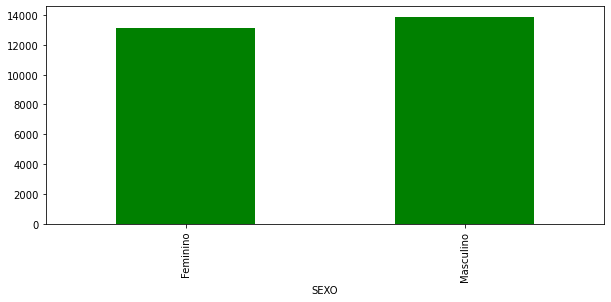

In [29]:
base_reduzida.groupby(["SEXO"])["DTNASC"].count().plot.bar(figsize=[10,4], color = "green")

<AxesSubplot:xlabel='RACACOR'>

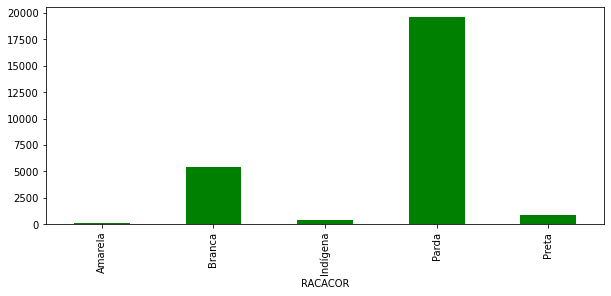

In [30]:
base_reduzida.groupby(["RACACOR"])["DTNASC"].count().plot.bar(figsize=[10,4], color = "green")